In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Load in the libraries and the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv("titanic.csv")

Have a look of the data:

In [3]:
titanic

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


Create the column `family size`, which is the number of sibling and spouses, plus number of parents and child, plus him/herself

In [4]:
titanic['family size'] = titanic['sibsp']+titanic['parch'] + 1

In [5]:
titanic

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family size
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,3
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,5
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0,1
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0,1
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1,2
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0,3


### Q1 Bar charts

#### a. Gender of the passengers onboard

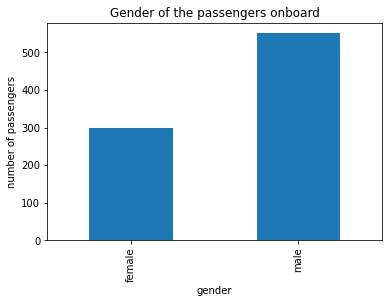

In [8]:
titanic.groupby('sex').size().plot.bar(title = 'Gender of the passengers onboard', ylabel = "number of passengers", xlabel = "gender");



#### b. Ticket class of the passengers onboard

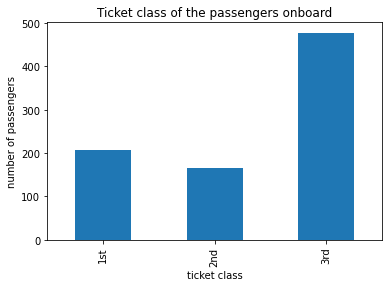

In [9]:
ax = titanic.groupby('pclass').size().plot.bar(title = 'Ticket class of the passengers onboard', xlabel = "ticket class", ylabel = "number of passengers")
ax.set_xticklabels(("1st", "2nd", "3rd"));


#### c. Survival of the passengers onboard

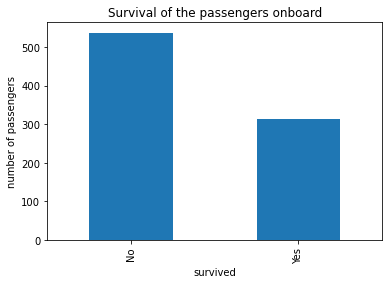

In [10]:
ax = titanic.groupby('survived').size().plot.bar(title = 'Survival of the passengers onboard', xlabel = "survived", ylabel = "number of passengers")
ax.set_xticklabels(("No", "Yes"));



### Q2 Age of the passengers onboard

#### a. Histogram 

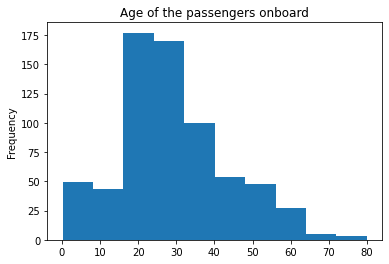

In [21]:
titanic['age'].plot(kind = 'hist', title = "Age of the passengers onboard");


#### b. Boxplot (group by ticket class)

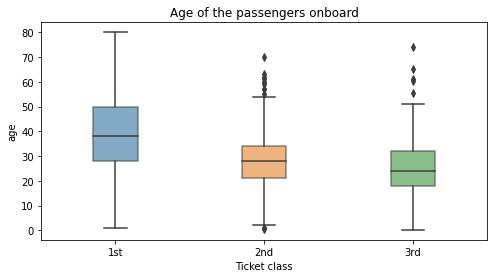

In [28]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(data = titanic, x = 'pclass', y = 'age', width = 0.3, 
            boxprops = dict(alpha=0.6)) # note in seaborn, alpha (and other parameters) is set in a different way

ax.set_xlabel("Ticket class")
ax.set_title("Age of the passengers onboard")
ax.set_xticklabels(("1st", "2nd", "3rd"));

plt.show()


#### b. Boxplot (group by survival)

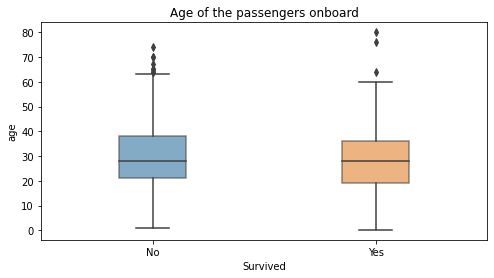

In [29]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(data = titanic, x = 'survived', y = 'age', width = 0.3, 
            boxprops = dict(alpha=0.6)) # note in seaborn, alpha (and other parameters) is set in a different way

ax.set_xlabel("Survived")
ax.set_xticklabels(("No", "Yes"));
ax.set_title("Age of the passengers onboard")
plt.show()

### Q3 Travel fare of the passengers onboard

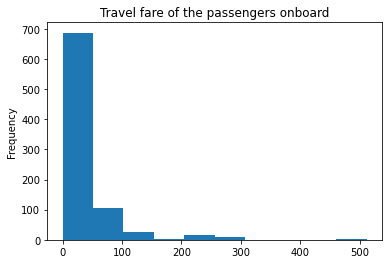

In [30]:
titanic['fare'].plot(kind = 'hist', title = "Travel fare of the passengers onboard", xlabel = 'fare');



In [35]:
titanic[['fare']].apply(lambda x: x == 0).groupby('fare').size()



fare
False    839
True      11
dtype: int64

### Q4 Family size per ticket class

Here let us explore graphs different from what we have shown for the R solution:

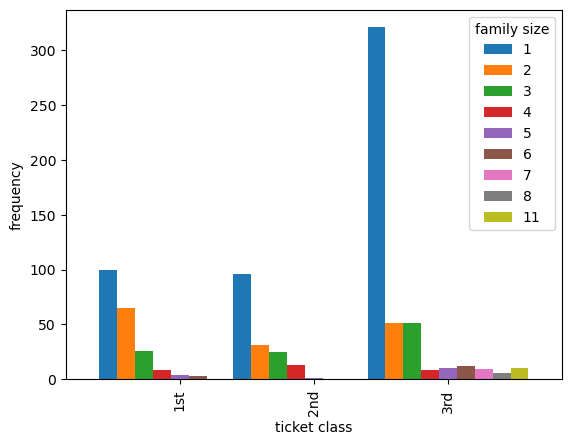

In [73]:
ax = titanic.groupby(['pclass', 'family size']).size().unstack().fillna(0).plot.bar(width=1.2, xlabel = 'ticket class', ylabel = 'frequency')
ax.set_xticklabels(("1st", "2nd", "3rd"));



In [38]:
# https://www.w3resource.com/pandas/dataframe/dataframe-unstack.php
# unstack() Pivot a level of the (necessarily hierarchical) index labels, 
# returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

ax = titanic.groupby(['pclass', 'family size']).size().unstack()
ax



family size,1,2,3,4,5,6,7,8,11
pclass,,,,,,,,,
1,100.0,65.0,26.0,8.0,4.0,3.0,NaN,NaN,NaN
2,96.0,31.0,25.0,13.0,1.0,NaN,NaN,NaN,NaN
3,321.0,51.0,51.0,8.0,10.0,12.0,9.0,6.0,10.0


In [39]:
x = titanic.groupby(['pclass', 'family size']).size()
x

pclass  family size
1       1              100
        2               65
        3               26
        4                8
        5                4
        6                3
2       1               96
        2               31
        3               25
        4               13
        5                1
3       1              321
        2               51
        3               51
        4                8
        5               10
        6               12
        7                9
        8                6
        11              10
dtype: int64

Or histogram to show the family size per ticket class

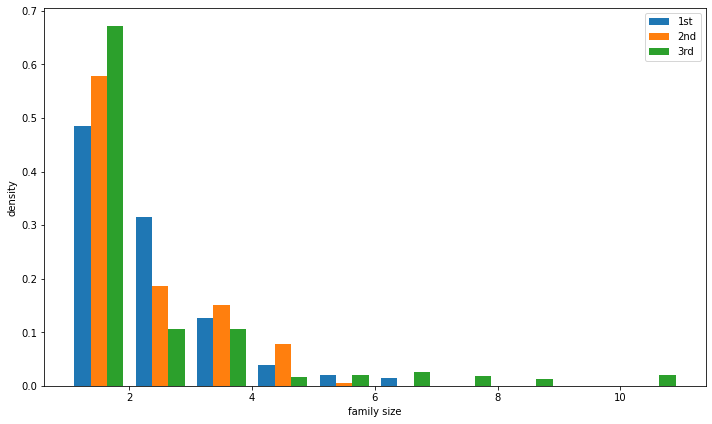

In [45]:
import numpy as np
import matplotlib.pyplot as plt

#plots the histogram
fig, ax = plt.subplots(figsize = (10, 6))
ax.hist([titanic.loc[titanic.pclass == class_idx, "family size"] for class_idx in range(1,4)], density = True, label=['1st', '2nd', '3rd'])
ax.set_ylabel("density")
ax.set_xlabel("family size")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()



In [74]:
[titanic.loc[titanic.pclass == class_idx, "family size"] for class_idx in range(1,4)]

[10     3
 11     1
 12     2
 18     2
 29     2
       ..
 839    2
 841    2
 844    2
 845    1
 846    1
 Name: family size, Length: 206, dtype: int64,
 3      5
 4      1
 7      1
 13     4
 16     1
       ..
 833    1
 835    1
 838    1
 847    2
 849    1
 Name: family size, Length: 166, dtype: int64,
 0      1
 1      1
 2      3
 5      1
 6      1
       ..
 828    1
 840    3
 842    1
 843    2
 848    3
 Name: family size, Length: 478, dtype: int64]

### Q5 Stacked bar charts to describe the survival rate per gender and ticket class

#### Survival rate per gender

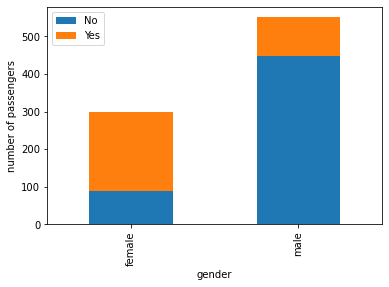

In [46]:
survival = titanic.groupby(['sex','survived']).size().unstack()
survival.columns = ["No", "Yes"]
survival.plot(kind='bar', stacked = True, ylabel = "number of passengers", xlabel = "gender");

#### Survival rate per travel class

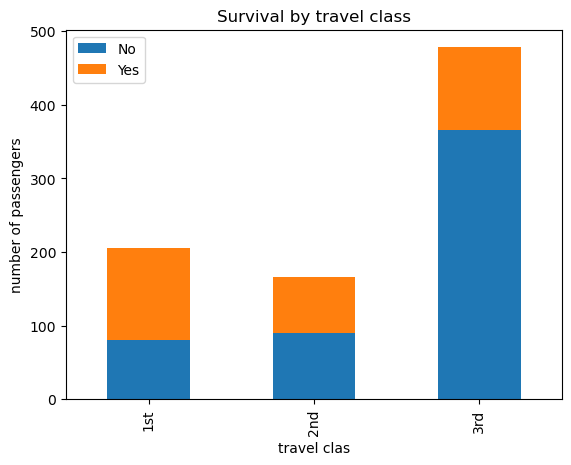

In [79]:
survival = titanic.groupby(['pclass','survived']).size().unstack()
survival.columns = ["No", "Yes"]
survival.index = ["1st", "2nd", "3rd"]
survival.plot(kind='bar', stacked = True, ylabel = "number of passengers", xlabel = "travel clas", title = "Survival by travel class");






### Q6. Violin chart describing the survival rate per age and gender

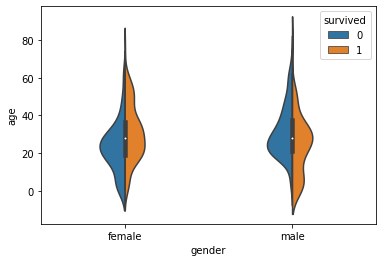

In [48]:
ax = sns.violinplot(data = titanic, x = 'sex', y = 'age', hue = 'survived', width = 0.3, split=True)
ax.set_xlabel("gender")
plt.show()

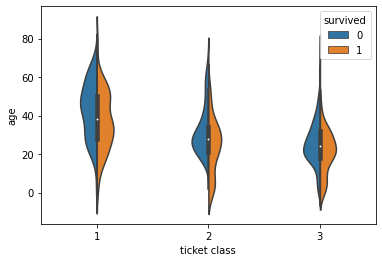

In [47]:
ax = sns.violinplot(data = titanic, x = 'pclass', y = 'age', hue = 'survived', width = 0.3, split=True)
ax.set_xlabel("ticket class")
plt.show()